# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [26]:
# Code Here
!pip install palmerpenguins
import palmerpenguins as penguin
penguins = penguin.load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [27]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [28]:
penguins.dropna(inplace=True)
print("DataFrame after dropping rows with missing values:")
penguins.info()

DataFrame after dropping rows with missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


In [29]:
import pandas as pd
penguins_dummified = pd.get_dummies(penguins, columns=['species', 'island', 'sex'], drop_first=True)
print("DataFrame after dummification:")
penguins_dummified.head()

DataFrame after dummification:


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181.0,3750.0,2007,False,False,False,True,True
1,39.5,17.4,186.0,3800.0,2007,False,False,False,True,False
2,40.3,18.0,195.0,3250.0,2007,False,False,False,True,False
4,36.7,19.3,193.0,3450.0,2007,False,False,False,True,False
5,39.3,20.6,190.0,3650.0,2007,False,False,False,True,True


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [30]:
X = penguins_dummified.drop('bill_depth_mm', axis=1)
y = penguins_dummified['bill_depth_mm']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression

# Initialize and train the Linear Regression model
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

# Make predictions on training and test sets
mlr_train_preds = mlr_model.predict(X_train)
mlr_test_preds = mlr_model.predict(X_test)


In [33]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and train the kNN model with K=5
knn5_model = KNeighborsRegressor(n_neighbors=5)
knn5_model.fit(X_train, y_train)

# Make predictions on training and test sets
knn5_train_preds = knn5_model.predict(X_train)
knn5_test_preds = knn5_model.predict(X_test)


In [34]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and train the kNN model with K=10
knn10_model = KNeighborsRegressor(n_neighbors=10)
knn10_model.fit(X_train, y_train)

# Make predictions on training and test sets
knn10_train_preds = knn10_model.predict(X_train)
knn10_test_preds = knn10_model.predict(X_test)


In [35]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on training and test sets
dt_train_preds = dt_model.predict(X_train)
dt_test_preds = dt_model.predict(X_test)


In [36]:
from sklearn.metrics import mean_squared_error

# Calculate MSE for Multiple Linear Regression
mlr_train_mse = mean_squared_error(y_train, mlr_train_preds)
mlr_test_mse = mean_squared_error(y_test, mlr_test_preds)

# Calculate MSE for kNN (K=5)
knn5_train_mse = mean_squared_error(y_train, knn5_train_preds)
knn5_test_mse = mean_squared_error(y_test, knn5_test_preds)

# Calculate MSE for kNN (K=10)
knn10_train_mse = mean_squared_error(y_train, knn10_train_preds)
knn10_test_mse = mean_squared_error(y_test, knn10_test_preds)

# Calculate MSE for Decision Tree
dt_train_mse = mean_squared_error(y_train, dt_train_preds)
dt_test_mse = mean_squared_error(y_test, dt_test_preds)

print(f"MLR Train MSE: {mlr_train_mse:.4f}, Test MSE: {mlr_test_mse:.4f}")
print(f"kNN (K=5) Train MSE: {knn5_train_mse:.4f}, Test MSE: {knn5_test_mse:.4f}")
print(f"kNN (K=10) Train MSE: {knn10_train_mse:.4f}, Test MSE: {knn10_test_mse:.4f}")
print(f"Decision Tree Train MSE: {dt_train_mse:.4f}, Test MSE: {dt_test_mse:.4f}")

MLR Train MSE: 0.5291, Test MSE: 0.8959
kNN (K=5) Train MSE: 1.5746, Test MSE: 2.9093
kNN (K=10) Train MSE: 1.8632, Test MSE: 2.2976
Decision Tree Train MSE: 0.0000, Test MSE: 1.3973


In [37]:
import pandas as pd
import numpy as np

# MSEs dictionary
errors = {
    'Model': ['Linear Regression', 'kNN (K=5)', 'kNN (K=10)', 'Decision Tree'],
    'Train MSE': [mlr_train_mse, knn5_train_mse, knn10_train_mse, dt_train_mse],
    'Test MSE': [mlr_test_mse, knn5_test_mse, knn10_test_mse, dt_test_mse]
}

# Convert to DataFrame
errors_df = pd.DataFrame(errors)

print("MSEs organized into a DataFrame:")
print(errors_df)


MSEs organized into a DataFrame:
               Model  Train MSE  Test MSE
0  Linear Regression   0.529104  0.895856
1          kNN (K=5)   1.574620  2.909254
2         kNN (K=10)   1.863204  2.297619
3      Decision Tree   0.000000  1.397313


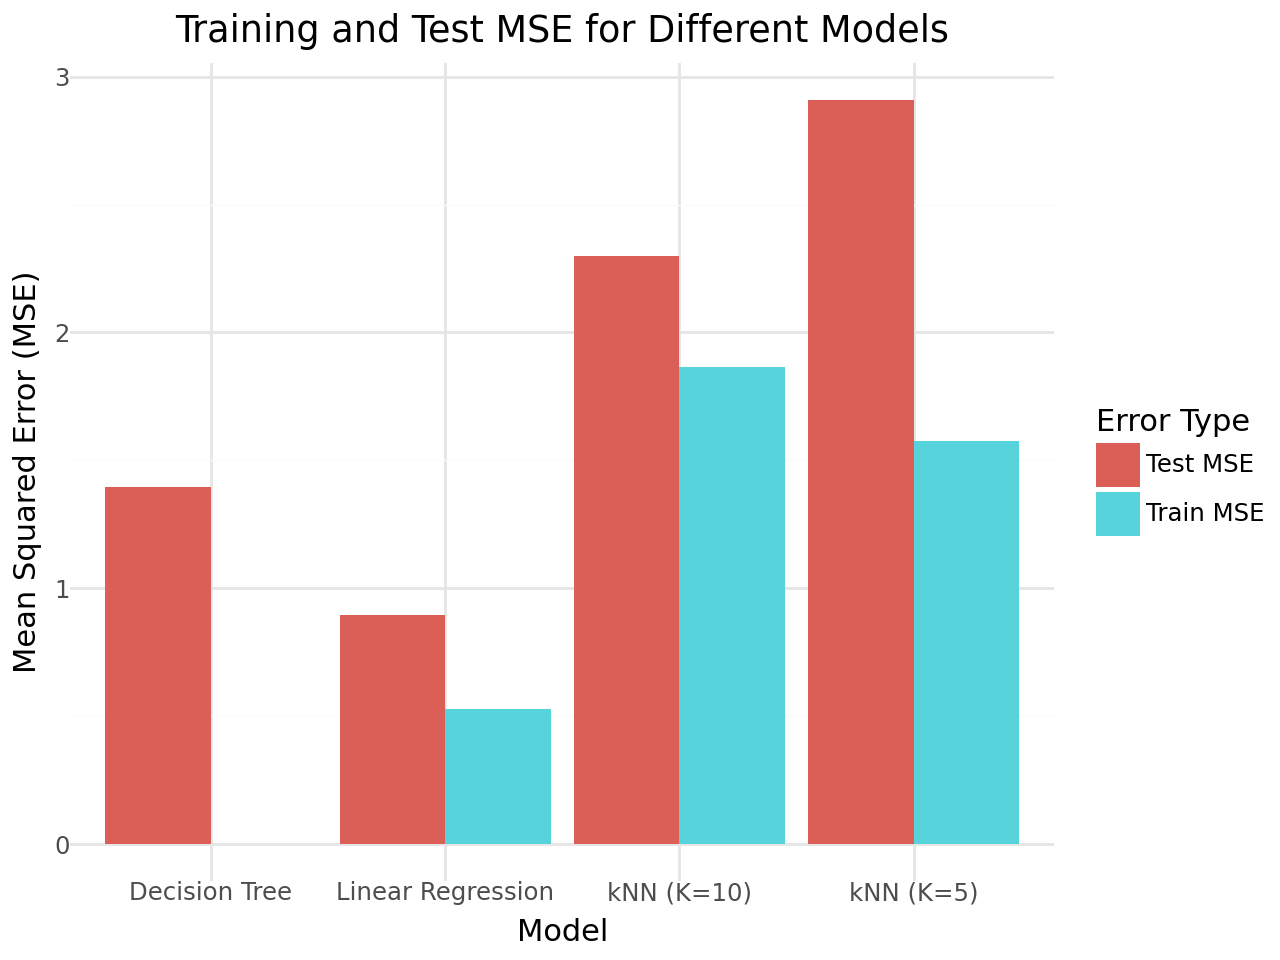

In [38]:
from plotnine import ggplot, aes, geom_bar, labs, theme_minimal

plot = (
    ggplot(errors_melted, aes(x='Model', y='MSE', fill='Error Type'))
    + geom_bar(stat='identity', position='dodge')
    + labs(
        title='Training and Test MSE for Different Models',
        x='Model',
        y='Mean Squared Error (MSE)'
    )
    + theme_minimal()
)

plot

Based on my MSE results, my linear regression model was the best!